In [1]:
import scipy.io
import numpy as np, h5py
import matplotlib.pyplot as plt
import copy
import pickle
%matplotlib inline

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
rcParams['figure.dpi']=150
rcParams['lines.linewidth']=1
rcParams['axes.grid']=True
rcParams['axes.facecolor']='#FFFFFF'
rcParams['font.size']=14
rcParams['patch.edgecolor']='none'

In [2]:
# fix random seed for reproducibility
seed = 8
np.random.seed(seed)

In [3]:
def readScan(scan):
    # We read the file saved in Matlab. There is only one variable in the file called scansMini
    data = h5py.File(scan, 'r')
    Xscans=data.get('scansMini')
    # We have to get the values into the right format (subjects, dim1, dim2, dim3, channels)
    X=copy.copy(Xscans.value)
    X=np.expand_dims(X,4)
    X1=np.rollaxis(X,3)
    return X1

In [4]:
X1=readScan('models2/scansMini1.mat')
X2=readScan('models2/scansMini2.mat')
X3=readScan('models2/scansMini3.mat')
X4=readScan('models2/scansMini4.mat')
X5=readScan('models2/scansMini5.mat')

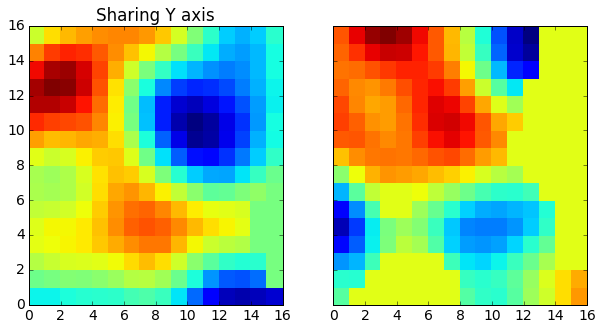

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.pcolor((X1[10,:,:,0,0]))
ax1.set_title('Sharing Y axis')
ax2.pcolor((X2[10,:,:,0,0]))

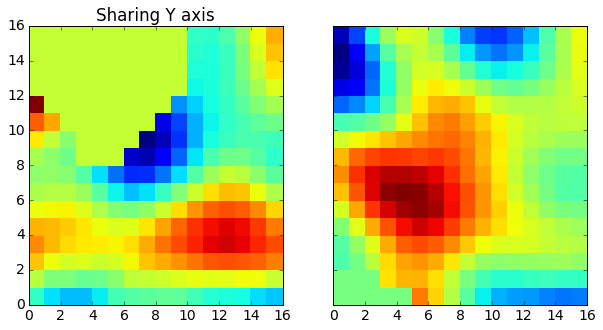

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.pcolor((X3[10,:,:,0,0]))
ax1.set_title('Sharing Y axis')
ax2.pcolor((X4[10,:,:,0,0]))

In [10]:
y=np.zeros((np.shape(X1)[0],1))
y[:26]=1
ysq=np.squeeze(y).astype(int)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Convolution3D
from keras.layers.pooling import MaxPooling3D
from keras.layers.core import Dense, Flatten
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
import time

Using TensorFlow backend.


In [12]:
from keras.layers import Merge

---

In [13]:
from keras.callbacks import EarlyStopping

In [10]:
from keras.utils.np_utils import to_categorical
y_binary = to_categorical(ysq)

image dimension order according https://www.youtube.com/watch?v=38ASRfA23t0   
tf: inputshape=(img_rows, img_cols,img_channels)   
theano: inputshape=(img_channels,img_rows, img_cols)

In [9]:
def baseline_model():
    model=Sequential()
    model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, init='uniform', activation='tanh'))
    model.add(Dense(1, init='uniform', activation='tanh'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=200, batch_size=10, verbose=0)
kfold = KFold(n=len(X), n_folds=8, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, ysq, cv=kfold)
print results
print results.mean()

[ 0.5         0.5         0.25        0.5625      0.4375      0.5
  0.5714286   0.35714287]
0.459821432829


---

---

---

---

In [35]:
final_model.reset_states()
model1.reset_states()
model2.reset_states()
model3.reset_states()
model4.reset_states()
model5.reset_states()

In [29]:
model1=Sequential()
model1.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))
model1.add(Flatten())
model1.add(Dense(20, init='glorot_normal', activation='tanh'))

In [30]:
model2=Sequential()
model2.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))
model2.add(Flatten())
model2.add(Dense(20, init='glorot_normal', activation='tanh'))

In [31]:
model3=Sequential()
model3.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))
model3.add(Flatten())
model3.add(Dense(20, init='glorot_normal', activation='tanh'))

In [32]:
model4=Sequential()
model4.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))
model4.add(Flatten())
model4.add(Dense(20, init='glorot_normal', activation='tanh'))

In [33]:
model5=Sequential()
model5.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))
model5.add(Flatten())
model5.add(Dense(20, init='glorot_normal', activation='tanh'))

In [34]:
merged = Merge([model1, model2, model3, model4, model5], mode='concat')
final_model = Sequential()
final_model.add(merged)
final_model.add(Dense(10, init='uniform', activation='tanh'))
final_model.add(Dense(1, init='uniform', activation='tanh'))
final_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
# Fit the model
t0 = time.time()
history=final_model.fit([X1, X2, X3, X4, X5], ysq, validation_split=0.2, nb_epoch=200, batch_size=16,verbose=0)#callbacks=[callbacks]
t1 = time.time()
print (t1-t0)/60/60

2.34291363723


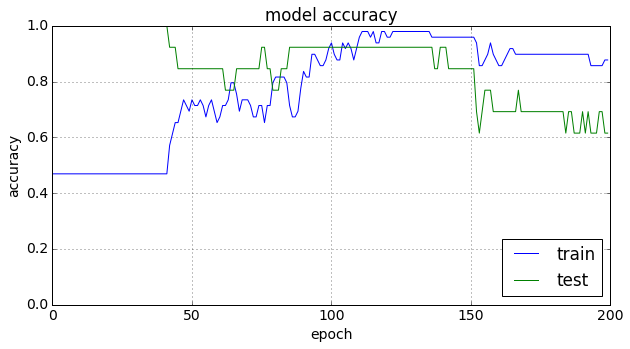

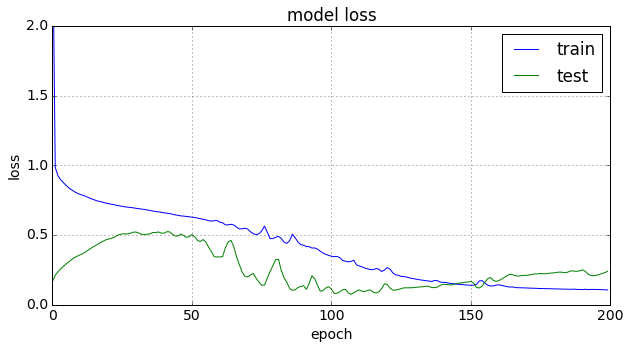

In [37]:
#draw_neural_net(fig.gca(), .1, .9, .1, .9, [numFeat, 1])
#summarize history for accuracy
fig=plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.ylim([0, 1])
plt.show()
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.ylim([0, 2])
plt.show()

In [11]:
model.save('m13c_50.h5')

In [19]:
print np.shape(y_binary)
print type(y_binary)
#print y_binary
y_binary1=y_binary[:,0]
print np.shape(y_binary1)
print type(y_binary1)

(62, 2)
<type 'numpy.ndarray'>
(62,)
<type 'numpy.ndarray'>


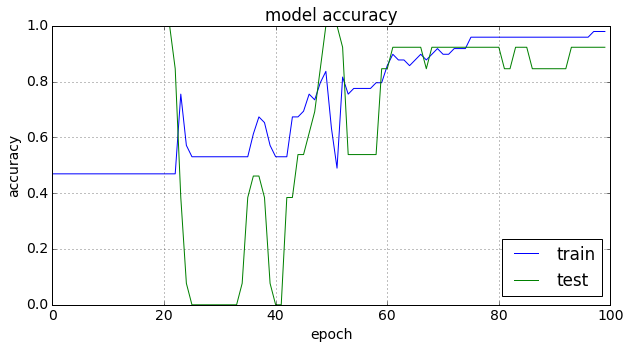

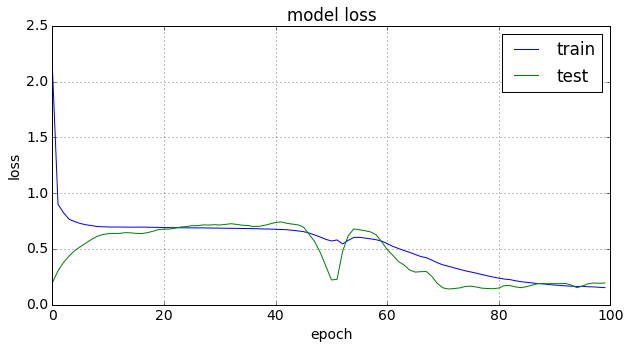

In [25]:
###### PLOTS summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.ylim([0, 1])
plt.show()
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
#plt.ylim([0, 1])
plt.show()

In [14]:
history.history['acc'][-10:-1]

[0.66935483870967738,
 0.68548387096774188,
 0.67741935483870963,
 0.67741935483870963,
 0.64516129032258063,
 0.62096774193548387,
 0.66935483870967738,
 0.66129032258064513,
 0.64516129032258063]

---

### Model 1
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
#model.add(MaxPooling3D(pool_size=(2,2,2),strides=None, border_mode='valid', dim_ordering='default'))   

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   
history=model.fit(X, y_binary, nb_epoch=500, **batch_size=10**,verbose=0)

---

### Model 2
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
**model.add(MaxPooling3D(pool_size=(2, 2, 2)))**   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

---

### Model 3
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
**model.add(MaxPooling3D(pool_size=(2, 2, 2)))   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))**   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

---

### Model 4
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
**model.add(MaxPooling3D(pool_size=(2, 2, 2)))   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(MaxPooling3D(pool_size=(2, 2, 2)))**   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   

---

### Model 5
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
**model.add(Dropout(0.2))**   
model.add(Convolution3D(10, 3, 3, 3, border_mode='valid', activation='relu'))   
model.add(MaxPooling3D(pool_size=(2, 2, 2)))   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   

---

### Model 6
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

---

### Model 7
#### Number of kernels
model=Sequential()   
model.add(Convolution3D(**32**, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

---

### Model 8   
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(MaxPooling3D(**pool_size=(4, 4, 4)**))     
model.add(Convolution3D(10, 3, 3, 3, border_mode='valid', activation='relu'))   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   

---

### Model 9   
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
**model.add(Convolution3D(10, 3, 3, 3, border_mode='valid', activation='relu'))**   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   

---

### Model 10   
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
**model.add(Convolution3D(10, 3, 3, 3, border_mode='valid', activation='relu'))**   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   
history=model.fit(X, y_binary, nb_epoch=500, **batch_size=32**,verbose=0)

---

### Model 11   
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
**model.add(Convolution3D(10, 3, 3, 3, border_mode='valid', activation='relu'))**   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   
history=model.fit(X, y_binary, nb_epoch=500, **batch_size=4**,verbose=0)

---

### Model 12   
### Demean data
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
**model.add(Convolution3D(10, 3, 3, 3, border_mode='valid', activation='relu'))**   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   
history=model.fit(X, y_binary, nb_epoch=500, **batch_size=4**,verbose=0)

---

### Model 13   
### Demean data
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   
history=model.fit(X, y_binary, nb_epoch=500, **batch_size=10**,verbose=0)

---

### Model 14   
### Demean data    
model=Sequential()   
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu', **init='he_normal'**))   
model.add(Flatten())   
model.add(Dense(100, **init='he_normal'**, activation='tanh'))   
model.add(Dense(2, **init='he_normal'**, activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   
history=model.fit(X, y_binary, nb_epoch=500, batch_size=10, verbose=0, validation_split=0.25, shuffle=True)   

---

### Model 15   
### Demean data   
model=Sequential()  
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(2, init='uniform', activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   
**callbacks=EarlyStopping(monitor='val_acc', verbose=0, mode='auto', patience=5)**   
history=model.fit(X, y_binary,validation_split=0.2, nb_epoch=50, batch_size=10,verbose=0,**callbacks=[callbacks]**)

---

### Model 16   
### Demean data   
model=Sequential()  
model.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model.add(Flatten())   
model.add(Dense(100, init='uniform', activation='tanh'))   
model.add(Dense(**1**, init='uniform', activation='tanh'))   
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   
**callbacks=EarlyStopping(monitor='val_acc', verbose=0, mode='auto', patience=5)**   
history=model.fit(X, **ysq**,validation_split=0.2, nb_epoch=50, batch_size=10,verbose=0)

---

### Model 17 demean data
model1=Sequential()   
model1.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model1.add(Flatten())   
model1.add(Dense(20, init='glorot_normal', activation='tanh'))   

model2=Sequential()   
model2.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model2.add(Flatten())   
model2.add(Dense(20, init='glorot_normal', activation='tanh'))   

merged = Merge([model1, model2], mode='concat')   
final_model = Sequential()   
final_model.add(merged)   
final_model.add(Dense(10, init='uniform', activation='tanh'))   
final_model.add(Dense(1, init='uniform', activation='tanh'))   
final_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   

history=final_model.fit([X1, X2], ysq, validation_split=0.2, nb_epoch=100, batch_size=16,verbose=0)#callbacks=[callbacks]

---

### Model 18 demean data
model1=Sequential()   
model1.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model1.add(Flatten())   
model1.add(Dense(20, init='glorot_normal', activation='tanh'))   

model2=Sequential()   
model2.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model2.add(Flatten())   
model2.add(Dense(20, init='glorot_normal', activation='tanh'))   

model3=Sequential()   
model3.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model3.add(Flatten())   
model3.add(Dense(20, init='glorot_normal', activation='tanh'))   

model4=Sequential()   
model4.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model4.add(Flatten())   
model4.add(Dense(20, init='glorot_normal', activation='tanh'))   

model5=Sequential()   
model5.add(Convolution3D(10, 3, 3, 3, input_shape=(16, 16, 16,1), border_mode='valid', activation='relu'))   
model5.add(Flatten())   
model5.add(Dense(20, init='glorot_normal', activation='tanh'))   

merged = Merge([model1, model2, model3, model4, model5], mode='concat')   
final_model = Sequential()   
final_model.add(merged)   
final_model.add(Dense(10, init='uniform', activation='tanh'))   
final_model.add(Dense(1, init='uniform', activation='tanh'))   
final_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])   

history=final_model.fit([X1, X2, X3, X4, X5], ysq, validation_split=0.2, nb_epoch=100, batch_size=16,verbose=0)#callbacks=[callbacks]